In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

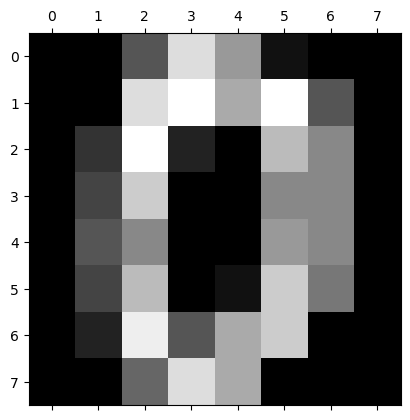

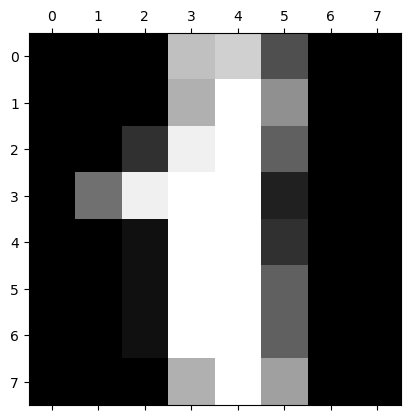

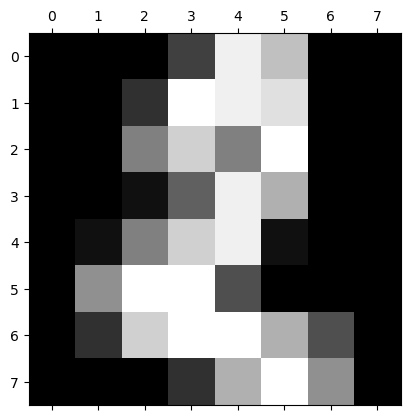

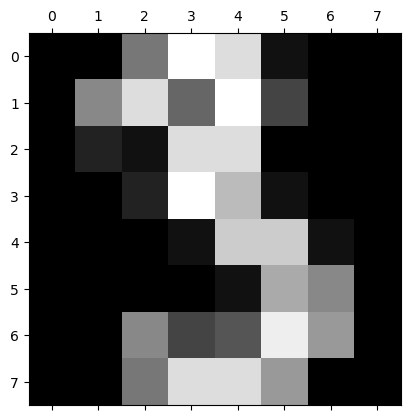

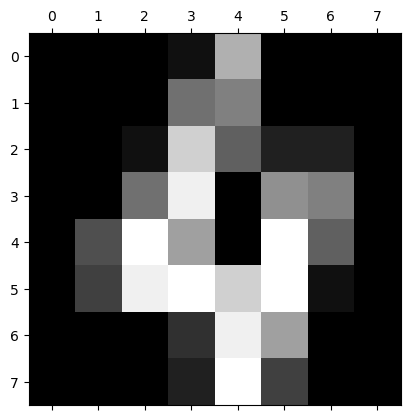

In [10]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [12]:
 digits.target[0:5]

array([0, 1, 2, 3, 4])

In [13]:
from sklearn.model_selection import train_test_split
train_test_split(digits.data, digits.target)

[array([[ 0.,  1., 10., ...,  4.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ..., 11.,  0.,  0.],
        ...,
        [ 0.,  0., 10., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  4.,  0.,  0.],
        [ 0.,  0.,  0., ..., 13.,  4.,  0.]]),
 array([[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  7., 16., ...,  0.,  0.,  0.],
        [ 0.,  0., 15., ..., 13.,  6.,  0.],
        ...,
        [ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([3, 7, 2, ..., 0, 4, 1]),
 array([1, 5, 8, 9, 4, 4, 9, 9, 8, 7, 9, 4, 4, 5, 7, 4, 6, 7, 1, 6, 1, 3,
        3, 4, 7, 8, 7, 1, 7, 8, 1, 4, 9, 0, 4, 8, 5, 6, 1, 8, 8, 2, 5, 5,
        8, 4, 9, 9, 4, 9, 7, 4, 8, 0, 9, 9, 3, 2, 6, 2, 8, 4, 1, 7, 2, 0,
        8, 2, 6, 8, 0, 2, 6, 7, 5, 4, 1, 4, 3, 0, 8, 9, 7, 6, 9, 1, 4, 0,
        0, 5, 4, 0, 7, 2, 6, 1, 1, 1, 4, 9, 0, 4, 2, 9, 7, 9, 2, 7, 8, 2,
        2, 8, 5, 7, 2, 0, 8

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
len(X_train)

1437

In [15]:
len(X_test)

360

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model.score(X_test, y_test)

0.95

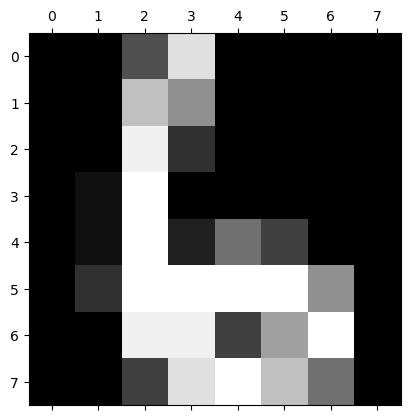

In [20]:
plt.matshow(digits.images[67])

In [21]:
digits.target[67]

6

In [22]:
model.predict([digits.data[67]])

array([6])

In [23]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0, 34,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 35,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  1, 42]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

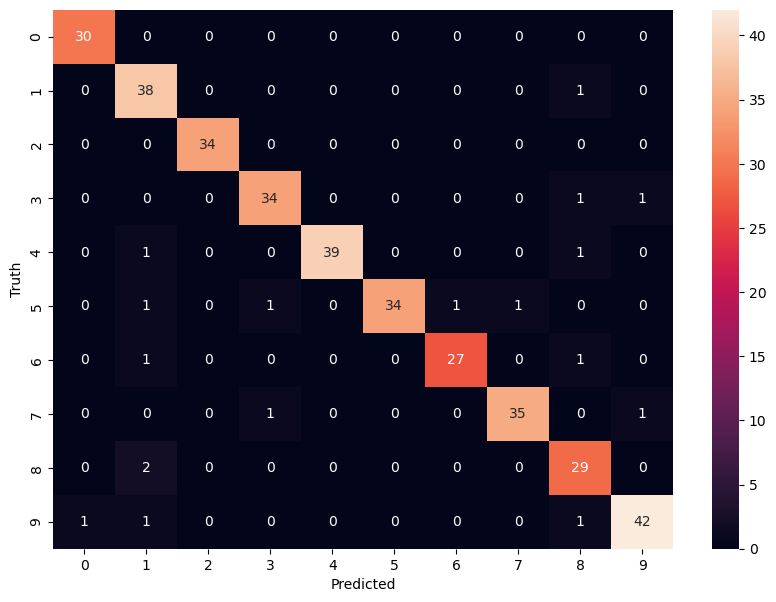

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')